# CFPB Twitter Analysis

The project examines all tweets from February 3, 2011 to October 8, 2020 from the following Twitter page:

 - **[CFPB](https://twitter.com/CFPB?ref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor)**

**Data Sources**

This project analyzes the Consumer Financial Protection Bureau's (CFPB) Twitter data. The CFPB Twitter data was collected and acquired from the [Social Feed Manager](https://library.gwu.edu/scholarly-technology-group/social-feed-manager).



### Data: importing and pre-processing

### Import packages

In [1]:
## Importing packages

# Importing packages for data manipulation and cleaning
import pandas as pd
import numpy as np

# Filter warning
import warnings
warnings.filterwarnings('ignore')

# Importing packages for visualization
import seaborn as sns

import matplotlib.pyplot as plt

# Telling matplotlib to use 538 style for graphs
plt.style.use('fivethirtyeight')
## 2nd option plt.style.use('seaborn-whitegrid')

# Telling matplotlib to use 'retina' display when ouputting graphs to make it sharper
%config InlineBackend.figure_format = 'retina'

# Making plot outputs appear
%matplotlib inline

### Load data 

In [2]:
# Load the twitter data
twitter = pd.read_csv('Twitter_Data.csv')

# Show the first 5 rows
twitter.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,...,user_favourites_count,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified
0,822149266269470720,https://twitter.com/CFPB/status/82214926626947...,Thu Jan 19 18:30:34 +0000 2017,2017-01-19 18:30:34+00:00,CFPB,Check out these 6 steps to avoid overdraft fee...,original,NaN,NaN,NaN,...,182,65075,17,1823,"Washington, DC",consumerfinance.gov,2409,Eastern Time (US & Canada),http://www.consumerfinance.gov,True
1,822142084480045056,https://twitter.com/CFPB/status/82214208448004...,Thu Jan 19 18:02:02 +0000 2017,2017-01-19 18:02:02+00:00,CFPB,"If you’re thinking about buying a home, RT and...",original,NaN,ShopMortgage,NaN,...,182,65075,17,1823,"Washington, DC",consumerfinance.gov,2409,Eastern Time (US & Canada),http://www.consumerfinance.gov,True
2,822097194266271750,https://twitter.com/CFPB/status/82209719426627...,Thu Jan 19 15:03:39 +0000 2017,2017-01-19 15:03:39+00:00,CFPB,Have you been wrongfully billed for Medicare c...,original,NaN,NaN,https://pbs.twimg.com/media/C2itCZgXAAAzsvz.jpg,...,182,65075,17,1823,"Washington, DC",consumerfinance.gov,2409,Eastern Time (US & Canada),http://www.consumerfinance.gov,True
3,822085279116890112,https://twitter.com/CFPB/status/82208527911689...,Thu Jan 19 14:16:18 +0000 2017,2017-01-19 14:16:18+00:00,CFPB,@JustinKramm_SF If you would like to submit a ...,original,NaN,NaN,NaN,...,182,65075,17,1823,"Washington, DC",consumerfinance.gov,2409,Eastern Time (US & Canada),http://www.consumerfinance.gov,True
4,822085060824367104,https://twitter.com/CFPB/status/82208506082436...,Thu Jan 19 14:15:26 +0000 2017,2017-01-19 14:15:26+00:00,CFPB,@JustinKramm_SF Thank you for your question. Y...,reply,NaN,NaN,NaN,...,182,65075,17,1823,"Washington, DC",consumerfinance.gov,2409,Eastern Time (US & Canada),http://www.consumerfinance.gov,True


In [3]:
# Checking number of rows (11,155) and columns (37)
twitter.shape

(11155, 37)

### Pre-processing

In [4]:
# Changing the parsed_created_at column to datetime to use all the date features Pandas offers
twitter['parsed_created_at'] = pd.to_datetime(twitter['parsed_created_at'])

In [5]:
# Checking the different types of data, confirming that parsed_created_at is now datetime64
twitter.dtypes

id                                            int64
tweet_url                                    object
created_at                                   object
parsed_created_at               datetime64[ns, UTC]
user_screen_name                             object
text                                         object
tweet_type                                   object
coordinates                                 float64
hashtags                                     object
media                                        object
urls                                         object
favorite_count                                int64
in_reply_to_screen_name                      object
in_reply_to_status_id                       float64
in_reply_to_user_id                         float64
lang                                         object
place                                       float64
possibly_sensitive                           object
retweet_count                                 int64
retweet_or_q

In [6]:
# Finding the number of unique values for each column
twitter.nunique()

id                              7852
tweet_url                       7852
created_at                      7232
parsed_created_at               7232
user_screen_name                   1
text                            7573
tweet_type                         4
coordinates                        0
hashtags                         858
media                           2793
urls                            3135
favorite_count                    42
in_reply_to_screen_name         1899
in_reply_to_status_id           2294
in_reply_to_user_id             1896
lang                               4
place                              0
possibly_sensitive                 1
retweet_count                     82
retweet_or_quote_id              231
retweet_or_quote_screen_name      80
retweet_or_quote_user_id          80
source                            12
user_id                            1
user_created_at                    1
user_default_profile_image         1
user_description                   2
u

In [7]:
# selecting unecessary columns, those with only 1 or 2 unique values
cols = twitter.nunique()[twitter.nunique()<3].index
# display index of column names to delete
cols

Index(['user_screen_name', 'coordinates', 'place', 'possibly_sensitive',
       'user_id', 'user_created_at', 'user_default_profile_image',
       'user_description', 'user_friends_count', 'user_location', 'user_name',
       'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [8]:
# perform deletion of columns saved in variable cols, specifying columns, inplace to avoid reassigning
twitter.drop(cols, 1, inplace=True)
# checking to see that columns with only 1 or 2 unique values were dropped
twitter.nunique()

id                              7852
tweet_url                       7852
created_at                      7232
parsed_created_at               7232
text                            7573
tweet_type                         4
hashtags                         858
media                           2793
urls                            3135
favorite_count                    42
in_reply_to_screen_name         1899
in_reply_to_status_id           2294
in_reply_to_user_id             1896
lang                               4
retweet_count                     82
retweet_or_quote_id              231
retweet_or_quote_screen_name      80
retweet_or_quote_user_id          80
source                            12
user_favourites_count             10
user_followers_count            1073
user_listed_count                280
user_statuses_count             1068
dtype: int64

In [9]:
# dropping "lang" column, specifying column, inplace to avoid reassigning
twitter.drop("lang", 1, inplace=True)

# selecting unecessary columns, those with less than 5 unique values
cols = twitter.nunique()[twitter.nunique()<5].index
cols

Index(['tweet_type'], dtype='object')

# Analysis and Visualizations

### Tweet type

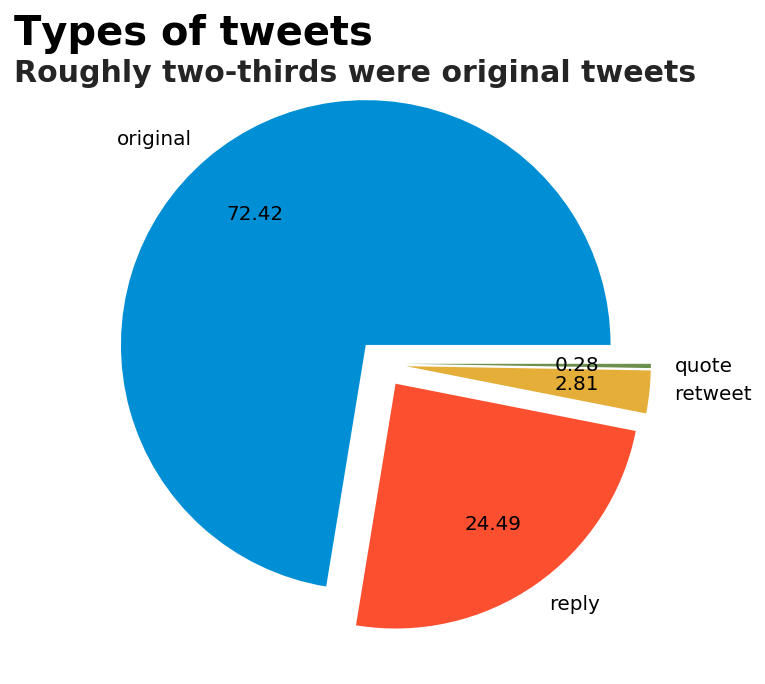

In [10]:
# Creating pie plot, configuring specifications
# (https://stackoverflow.com/questions/30059862/pandas-pie-chart-plot-remove-the-label-text-on-the-wedge)
fig, ax = plt.subplots(figsize=(11,5))
explode = (0.1, 0.1, 0.1, 0.1) 
patches, text, _ = ax.pie(twitter["tweet_type"].value_counts(), autopct='%.2f', explode=explode, startangle=0, 
                          pctdistance=0.7, labels=twitter["tweet_type"].value_counts().index)
## ax.legend(patches, labels=twitter["tweet_type"].value_counts().index, loc='best')

# Take out matplotlib message, adjust placement
plt.tight_layout()
plt.subplots_adjust(top=0.88)

# Putting title and subtitle in specific x,y coordinates
# customizing font size, weight, and transparency
ax.text(-1.5,1.3, "Types of tweets", fontsize=20, fontweight="bold")
ax.text(-1.5,1.15, "Roughly two-thirds were original tweets", fontsize=15, fontweight="bold", alpha=0.85)

# saving image
plt.savefig('1tweet_type_ratio.png')

Based on the pie chart above, we can see that roughly two-thirds of the tweets from the @CFPB page were original tweets. Almost one-third were replies to others, only a very small percentage (2.81%) were retweets, and 0.28% were quotes. 

### Hashtags

In [11]:
# Counting the total number of tweets by hashtag
hashtag_totals = twitter['hashtags'].value_counts()
# Checking first 5
hashtag_totals.head()

KnowBeforeYouOwe     150
MoneyAsYouGrow       133
StudentDebtStress    112
MoneyTalk             92
AskCFPB               89
Name: hashtags, dtype: int64

In [12]:
# checking length
len(hashtag_totals)

858

In [13]:
# Creating wc as a dictionary of the hashtag value counts
wc = pd.DataFrame(twitter.hashtags.value_counts()).to_dict()['hashtags']
wc

{'KnowBeforeYouOwe': 150,
 'MoneyAsYouGrow': 133,
 'StudentDebtStress': 112,
 'MoneyTalk': 92,
 'AskCFPB': 89,
 'CFPW2020': 82,
 'mortgage': 70,
 'NCPW': 60,
 'ShopMortgage': 57,
 'prepaid': 57,
 'autoloan': 48,
 'CFPB': 46,
 'studentdebt': 44,
 'studentloan': 41,
 'debtcollection': 40,
 'AskFAFSA': 36,
 'SeniorMoney': 36,
 'NewCar': 35,
 '4Years4You': 34,
 'ConsumersCount': 34,
 'YouSavedForThis': 33,
 'midinero': 32,
 'AutoLoan': 32,
 'DebtCollection': 28,
 'debt': 28,
 'BankingonCampus': 28,
 'StartSmallSaveUp': 27,
 'CARDAct': 26,
 'SocialSecurity': 26,
 'OwningAHome': 26,
 'GovFinChat': 24,
 'NewCar AutoLoan': 23,
 'aske2i': 22,
 'studentloans': 20,
 'StudentDebt': 20,
 'Fraud': 20,
 'FindYourPlace': 20,
 'FinancialPlanningMonth': 20,
 'creditcard': 20,
 'CreditReport': 20,
 'TodaysTip FinancialPlanningMonth': 19,
 'retirement': 19,
 'NaturalDisaster EmergencyPreparedness DisasterRecovery': 19,
 'KidsTalkMoney': 18,
 'coronavirus': 17,
 'CreditReports': 16,
 'CreditReporting': 16,

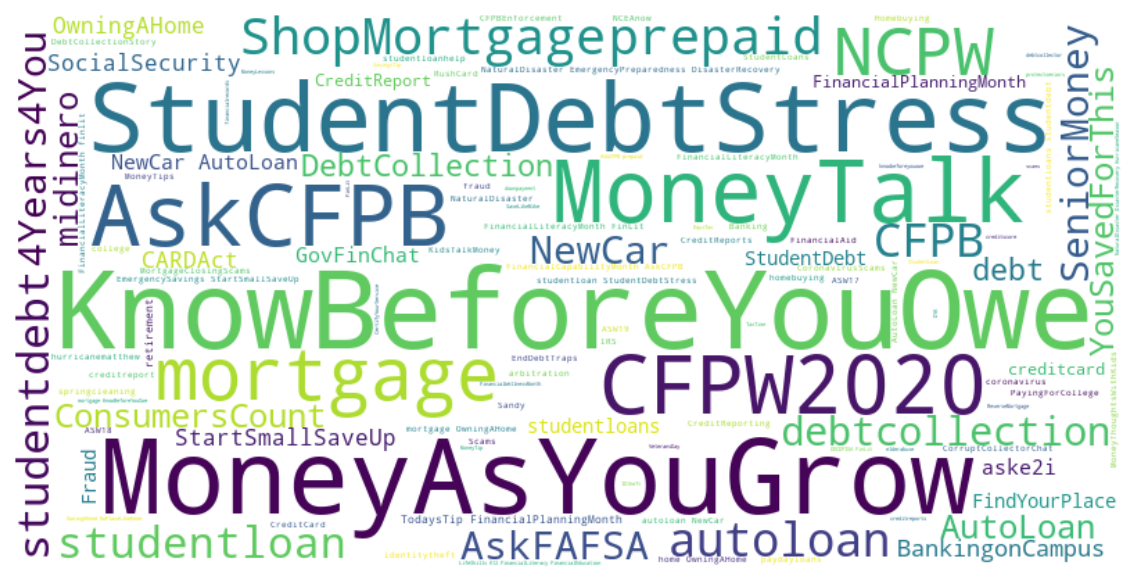

In [14]:
# import WordCloud package
from wordcloud import WordCloud
# create word cloud of hashtags, edit specifications
wc_ = WordCloud(width=800, height=400, 
                 background_color ='white', max_words=120).generate_from_frequencies(wc)
# adjust size, improve visualization, show graph
plt.figure(figsize=(8, 5))
plt.imshow(wc_, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()
# saving image
plt.savefig('2hashtag_wc.png')

The word cloud visually shows the frequency of the used hashtags from the Twitter dataset. #KnowBeforeYouOwe, #MoneyAsYouGrow, and #StudentDebtStress were most frequently used and likely point toward their focus as an organization, such as about thinking before borrowing, student debt, and saving up money. They were closely trailed by #MoneyTalk, #AskCFPB, and #CFPW2020.

### Days of week

In [15]:
# creating column day_of_week and fill it with parsed date tweet was created
twitter['day_of_week'] = twitter.parsed_created_at.dt.day_name()
# creating list of the names of the day of the week
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# groups and counts by day of week, reset index
out = twitter.groupby('day_of_week').count().reindex(day_names).reset_index()
# checking output
out

,day_of_week,id,tweet_url,created_at,parsed_created_at,text,tweet_type,hashtags,media,urls,...,in_reply_to_user_id,retweet_count,retweet_or_quote_id,retweet_or_quote_screen_name,retweet_or_quote_user_id,source,user_favourites_count,user_followers_count,user_listed_count,user_statuses_count
0,Monday,1766,1766,1766,1766,1766,1766,673,538,1452,...,570,1766,37,37,37,1766,1766,1766,1766,1766
1,Tuesday,2105,2105,2105,2105,2105,2105,820,628,1669,...,618,2105,77,77,77,2105,2105,2105,2105,2105
2,Wednesday,2174,2174,2174,2174,2174,2174,839,638,1831,...,555,2174,93,93,93,2174,2174,2174,2174,2174
3,Thursday,2079,2079,2079,2079,2079,2079,835,693,1745,...,457,2079,85,85,85,2079,2079,2079,2079,2079
4,Friday,1850,1850,1850,1850,1850,1850,600,607,1563,...,512,1850,53,53,53,1850,1850,1850,1850,1850
5,Saturday,747,747,747,747,747,747,332,437,726,...,35,747,2,2,2,747,747,747,747,747
6,Sunday,434,434,434,434,434,434,165,282,418,...,32,434,0,0,0,434,434,434,434,434


In [16]:
# names of columns from variable out
out.columns

Index(['day_of_week', 'id', 'tweet_url', 'created_at', 'parsed_created_at',
       'text', 'tweet_type', 'hashtags', 'media', 'urls', 'favorite_count',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'retweet_count', 'retweet_or_quote_id',
       'retweet_or_quote_screen_name', 'retweet_or_quote_user_id', 'source',
       'user_favourites_count', 'user_followers_count', 'user_listed_count',
       'user_statuses_count'],
      dtype='object')

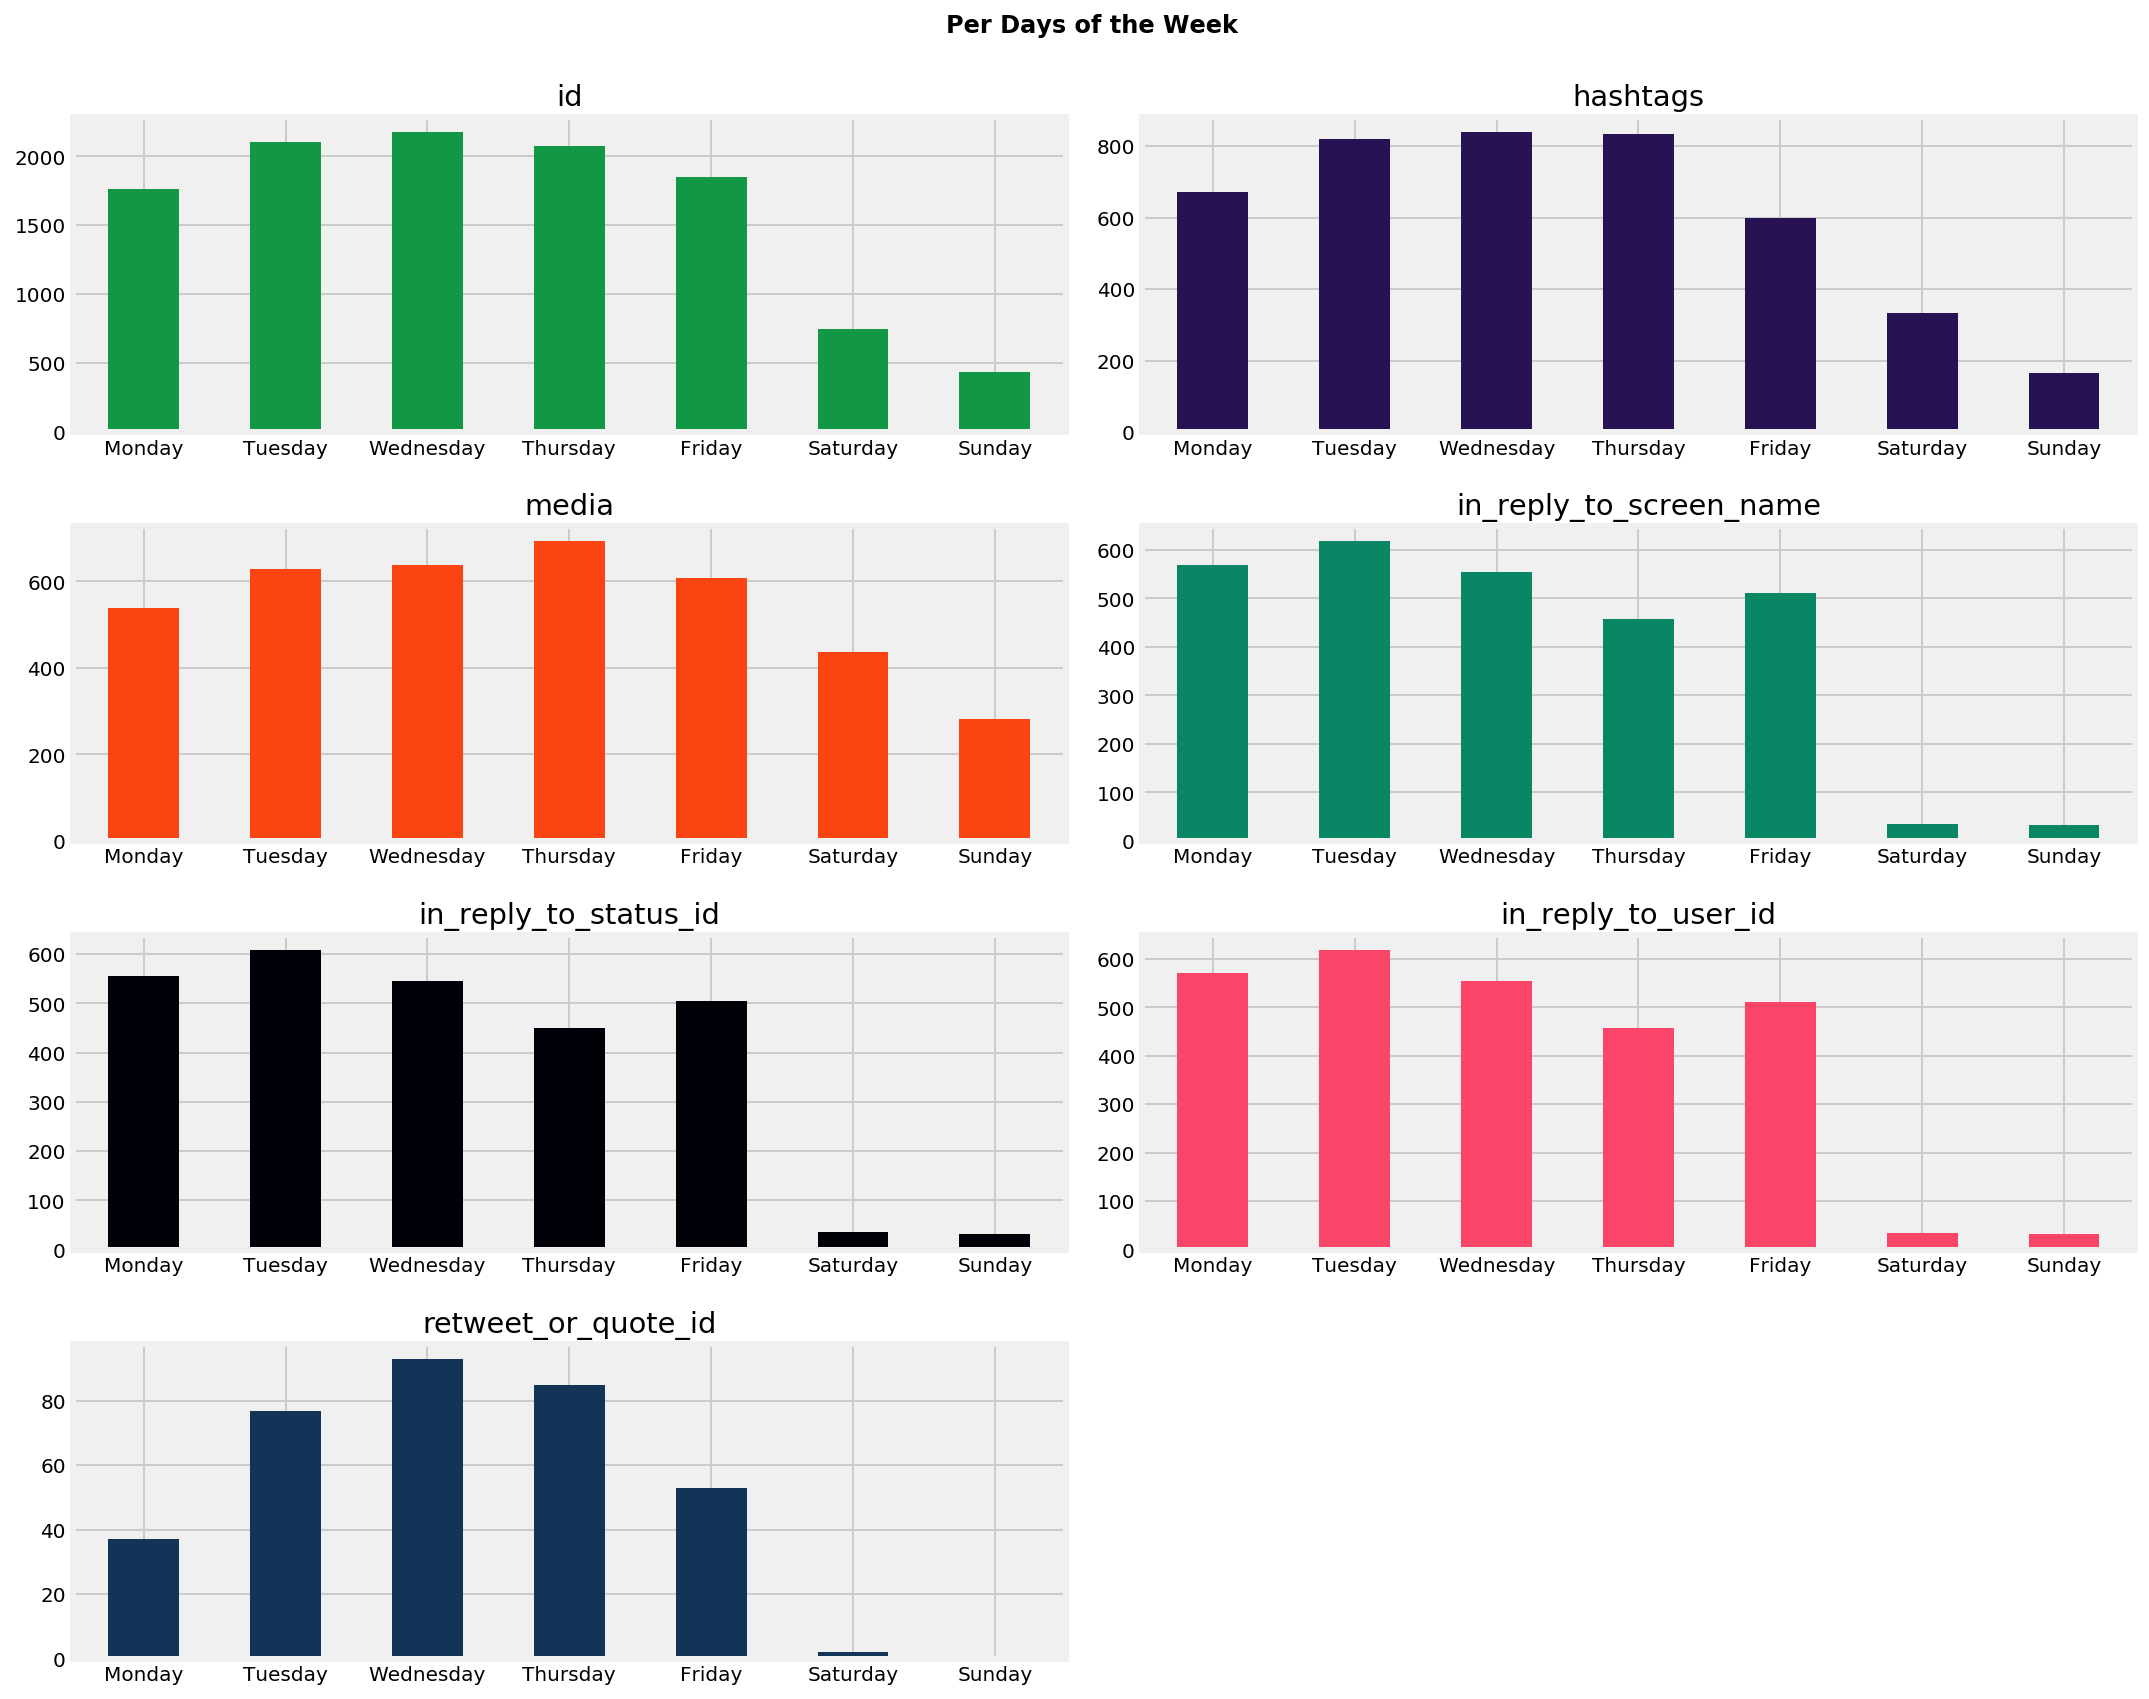

In [17]:
# creating subplots of metrics per day of the week, removing extra
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15,12))
axs = axs.flatten()
axs[-1].remove()

# columns
labels = ['id', 'hashtags', 'media','in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'retweet_or_quote_id']
# saving selected columns into dat for bar graphs
dat = out[labels]
# tightening up, setting colors, labels, title, ticks in bar graphs
fig.tight_layout()
colors =  ['#129845','#271254', '#FA4411', '#098765', '#000009', '#FA4568', '#123456']
for col, ax, c in zip(labels, axs, colors):
    dat[col].plot.bar(ax=ax, color=c)
    ax.set_title(col)
    ax.set_xticklabels(out.day_of_week.values, rotation=0)
#adjusting, setting title and spacing    
fig.subplots_adjust(top=0.92)
fig.suptitle("Per Days of the Week", fontweight='bold')
fig.subplots_adjust(hspace=0.3)

# saving image
plt.savefig('3days_of_week.png')

The bar graphs give an overview of the activity based on the days of the week. The weekend was clearly not as active when compared to Tuesday-Thursday. Furthermore, the retweet and quote id were the least active, overall, particularly on Sunday.

In [18]:
# finding percentage/ratio of hashtags
# creating variable favs of the sorted order of the sum of favorite_count, grouped by hashtag
favs = twitter.groupby('hashtags').favorite_count.sum().sort_values(ascending=False)

# MOST USED HASHTAGS
# most_hashtag = twitter['hashtags'].value_counts().reset_index(name='count')
# most_hashtag.head

# calculating the percentage
favs = favs/favs.sum()*100
# checking
favs

hashtags
MoneyAsYouGrow                                      4.010417
mortgages knowbeforeyouowe                          3.553241
KnowBeforeYouOwe                                    2.129630
4Years4You                                          2.048611
mortgage                                            1.950231
ConsumersCount                                      1.921296
prepaid                                             1.892361
EndDebtTraps                                        1.527778
ShopMortgage                                        1.452546
StudentDebtStress                                   1.412037
Harvey                                              1.278935
debtcollection                                      1.192130
studentloan                                         1.180556
autoloan                                            1.070602
arbitration                                         1.030093
CFPW2020                                            0.873843
Equifax        

In [19]:
#favs = favs[favs>1]
#favs.loc['others'] = 100 - favs.sum()

# selecting top 10 favorite hashtags
favs = favs[:10]
# checking
favs

hashtags
MoneyAsYouGrow                4.010417
mortgages knowbeforeyouowe    3.553241
KnowBeforeYouOwe              2.129630
4Years4You                    2.048611
mortgage                      1.950231
ConsumersCount                1.921296
prepaid                       1.892361
EndDebtTraps                  1.527778
ShopMortgage                  1.452546
StudentDebtStress             1.412037
Name: favorite_count, dtype: float64

In [20]:
# creating variable other, which is the percentage of other than the top 10 hashtags 
others = 100 - favs.sum()  
# checking
others

78.10185185185185

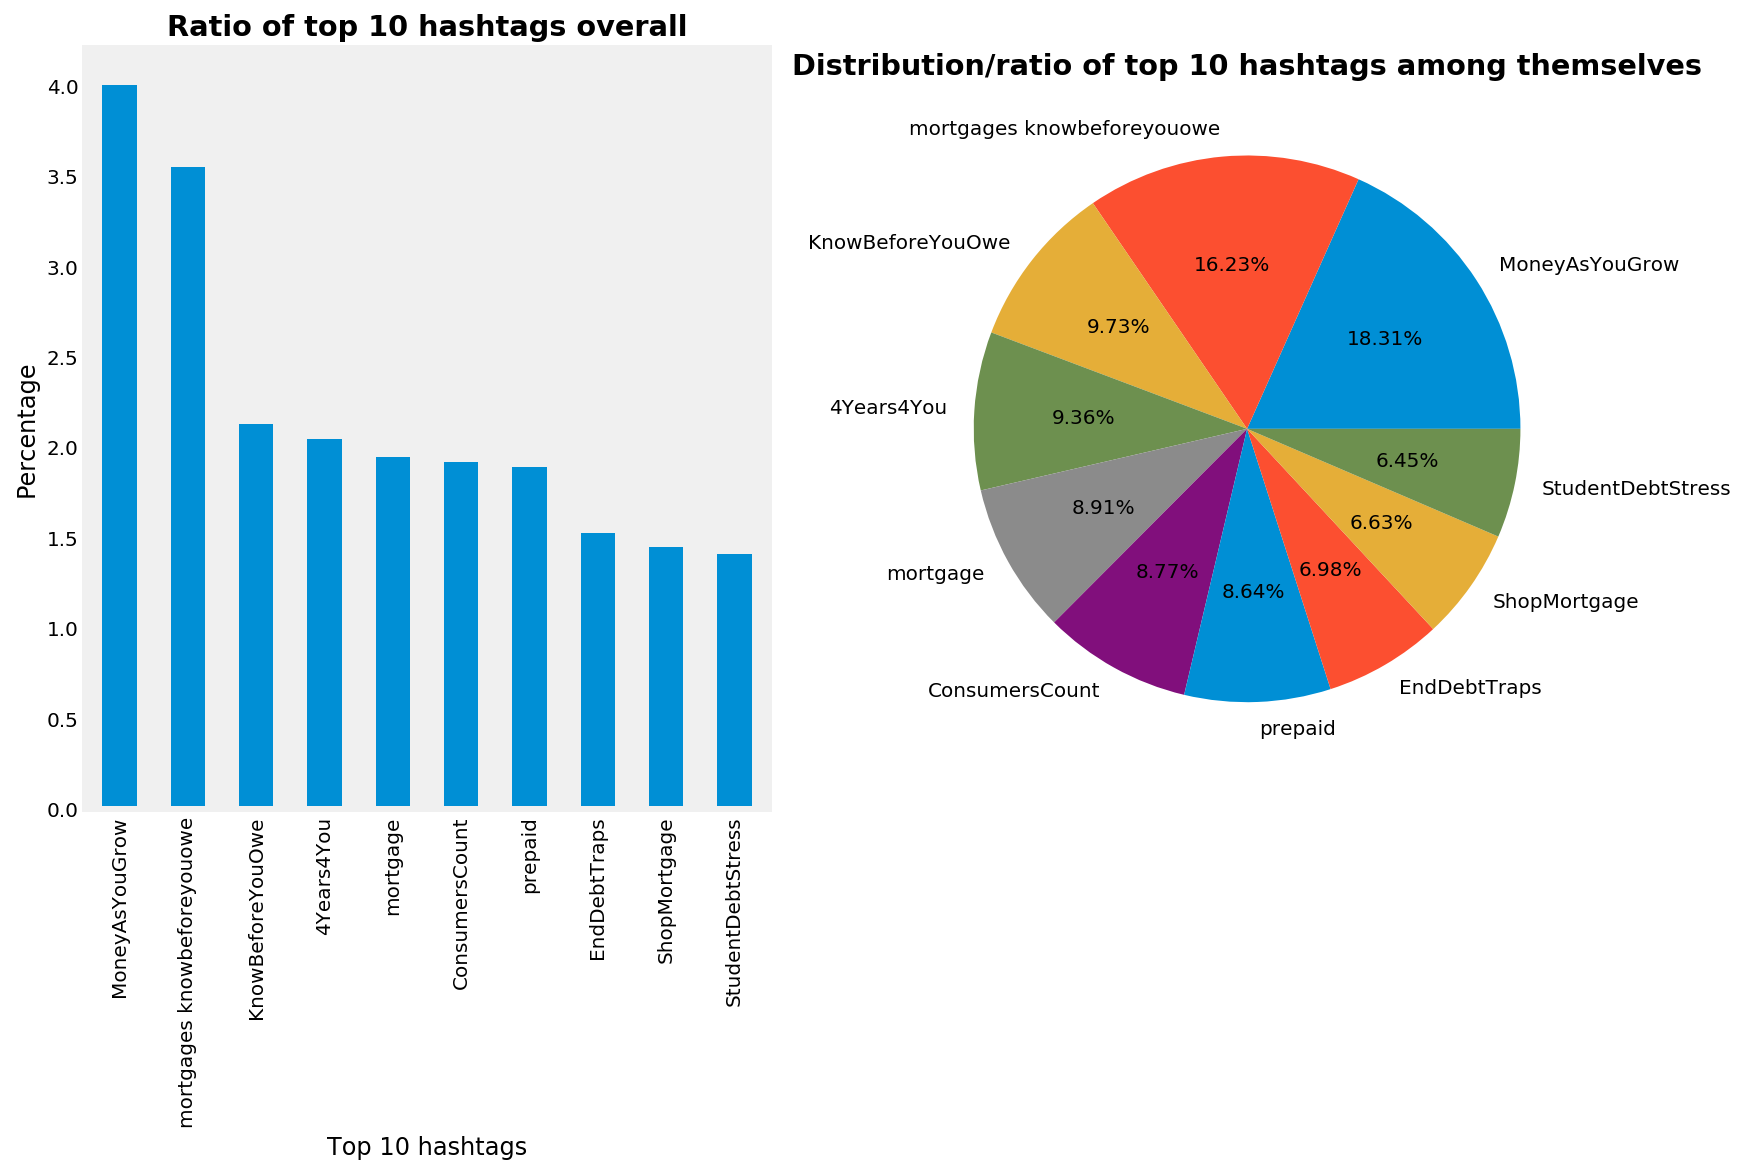

<Figure size 432x288 with 0 Axes>

In [21]:
# plotting ratio of top hashtags overall and ratio of top hashtags among themselves
figs, axes = plt.subplots(1,2, figsize=(12,7))
# creates a barplot from dataframe favs, turns off the grid parameter
favs.plot(ax=axes[0], kind='bar', grid=False)
# on axis 1, creates a pie chart of favs, labels are favs index, autopct is a function 
# that changes the input values to a percentage string for display 
axes[1].pie(favs, autopct=lambda x: f'{x:.2f}%', startangle=0, labels=favs.index) 

# setting title and labels
axes[0].set_title("Ratio of top 10 hashtags overall", fontweight='bold')
axes[1].set_title("Distribution/ratio of top 10 hashtags among themselves", fontweight='bold')
axes[0].set_ylabel("Percentage")
axes[0].set_xlabel("Top 10 hashtags")

plt.show()

# saving image
plt.savefig('4hashtag_pct.png')

Overall, the top 10 hashtags account for around 22% of the total hashtags. The hashtags in the "others" (those below the top 10) account for around 78% of the hashtags. 

Among these top 10 hashtags only, #MoneyAsYouGrow accounts for around 18%, the hashtags #knowbeforeyouowe with regards to #mortgages accounts for around 16%, and #KnowBeforeYouOwe for around 10%. 

In [22]:
# finding mentions of Experian, Transunion, Equifax, JPMorgan, and Capital One
twitter['Experian'] = twitter['text'].str.lower().str.contains('experian') 
twitter['Transunion'] = twitter['text'].str.lower().str.contains('transunion') 
twitter['Equifax'] = twitter['text'].str.lower().str.contains('equifax') 
twitter['JPMorgan'] = twitter['text'].str.lower().str.contains('jpmorgan')
twitter['Capital One'] = twitter['text'].str.lower().str.contains('capital one') 

# counting each mention of experian, transunion, equifax, jpmorgan, and capital one
credit_bureaus_count = twitter[['Experian', 'Transunion', 'Equifax', 'JPMorgan','Capital One']].sum(axis=0).reset_index(name='Count')
credit_bureaus_count

,index,Count
0,Experian,8
1,Transunion,5
2,Equifax,32
3,JPMorgan,8
4,Capital One,4


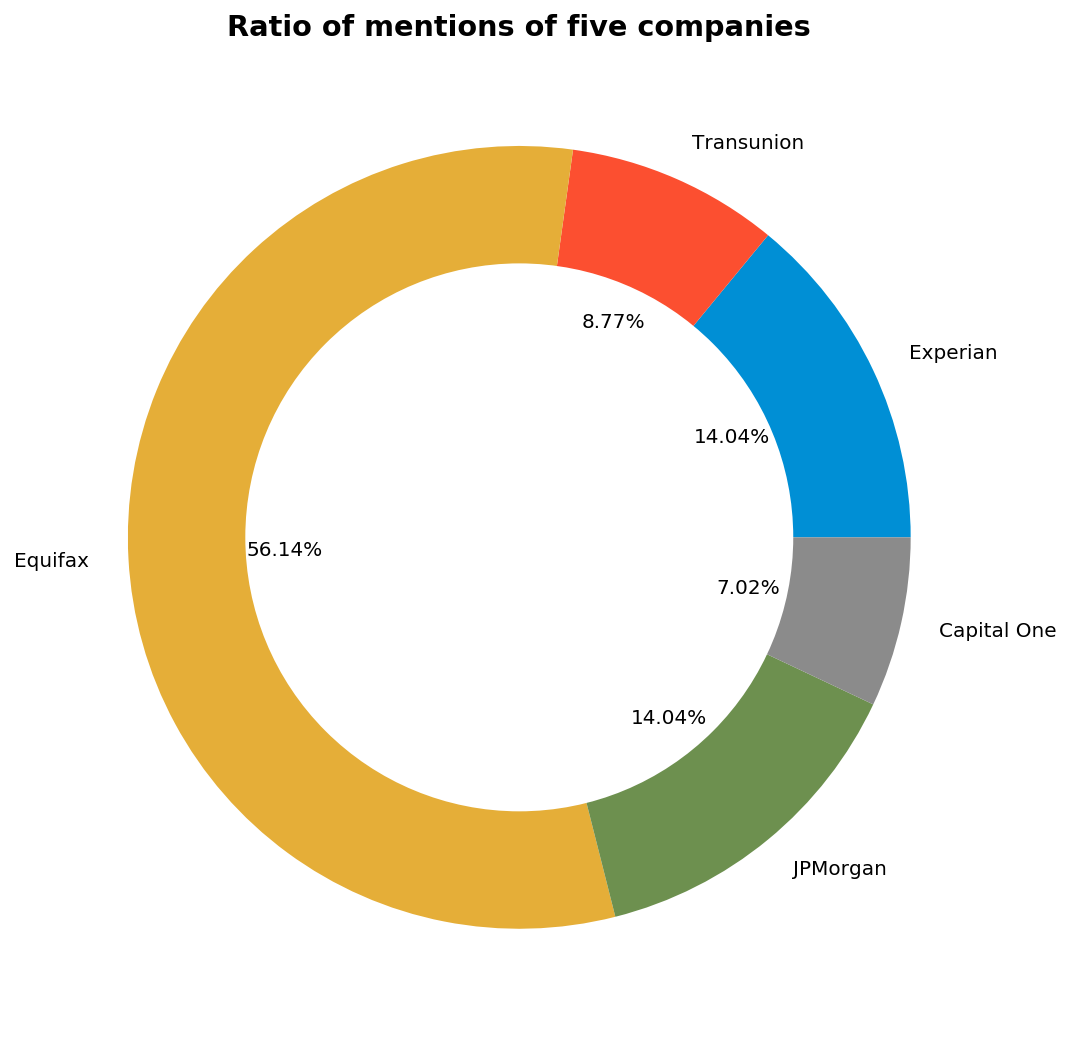

In [23]:
# creating circle/donut plot break down of the selected credit_bureaus
# (https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f)
credit_bureaus_count.Count.plot.pie(autopct=lambda x: f'{x:.2f}%', figsize=(9,9), labels =credit_bureaus_count["index"] )
# plot, configure, and draw a white circle over the center of the plot
circle = plt.Circle((0,0),0.70,fc='white') 
fig = plt.gcf() 
fig.gca().add_artist(circle)
plt.ylabel("")
plt.title("Ratio of mentions of five companies", fontweight='bold')
plt.savefig('5hashtag_pct.png')

Consumers often have complaints about the credit bureaus or large banks. In fact, companies such as Equifax have gone through very public issues like the 2017 data breach, which may have been reflected in this dataset. After checking to see how often there were mentions of "Equifax," "JPMorgan," "Experian," "Transunion," and "Capital One," it was not surprising to see that Equifax was holding the number one spot among these companies, representing around 56% of the mentions among these. Another credit agency called Experian was in second, followed by JPMorgan with around 14%. This is followed by another credit agency called Transunion with almost 9%, and then Capital One with around 7%.   

### Loading for text analysis

In [24]:
twitter_df = pd.read_csv('Twitter_Data.csv')

In [25]:
# (https://github.com/lisanka93/text_analysis_python_101/blob/master/Dummy%20movie%20dataset.ipynb)
# importing relevant packages
import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords

# setting stop words
stop_words = set(stopwords.words('english'))

def preprocess(raw_text):
    
    # regular expression removing links
    no_links_text = re.sub("((https|http|www)[\S]*)", " ", raw_text)
    
    # regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", no_links_text)

    # convert to lower case and split into words 
    # convert string into list 
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer()
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm/lemmatize
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [26]:
# cleaning text
# making a new column 'prep', taking all twitter_df text, apply preprocess function
# removing stop words, stemming words, lemmatizing words and returning as string
twitter_df['prep'] = twitter_df['text'].apply(preprocess)
twitter_df.head()

,id,tweet_url,created_at,parsed_created_at,user_screen_name,text,tweet_type,coordinates,hashtags,media,...,user_followers_count,user_friends_count,user_listed_count,user_location,user_name,user_statuses_count,user_time_zone,user_urls,user_verified,prep
0,822149266269470720,https://twitter.com/CFPB/status/82214926626947...,Thu Jan 19 18:30:34 +0000 2017,2017-01-19 18:30:34+00:00,CFPB,Check out these 6 steps to avoid overdraft fee...,original,NaN,NaN,NaN,...,65075,17,1823,"Washington, DC",consumerfinance.gov,2409,Eastern Time (US & Canada),http://www.consumerfinance.gov,True,check step avoid overdraft fee
1,822142084480045056,https://twitter.com/CFPB/status/82214208448004...,Thu Jan 19 18:02:02 +0000 2017,2017-01-19 18:02:02+00:00,CFPB,"If you’re thinking about buying a home, RT and...",original,NaN,ShopMortgage,NaN,...,65075,17,1823,"Washington, DC",consumerfinance.gov,2409,Eastern Time (US & Canada),http://www.consumerfinance.gov,True,think buy home rt read blog learn shopmortgag
2,822097194266271750,https://twitter.com/CFPB/status/82209719426627...,Thu Jan 19 15:03:39 +0000 2017,2017-01-19 15:03:39+00:00,CFPB,Have you been wrongfully billed for Medicare c...,original,NaN,NaN,https://pbs.twimg.com/media/C2itCZgXAAAzsvz.jpg,...,65075,17,1823,"Washington, DC",consumerfinance.gov,2409,Eastern Time (US & Canada),http://www.consumerfinance.gov,True,wrong bill medicar cost learn
3,822085279116890112,https://twitter.com/CFPB/status/82208527911689...,Thu Jan 19 14:16:18 +0000 2017,2017-01-19 14:16:18+00:00,CFPB,@JustinKramm_SF If you would like to submit a ...,original,NaN,NaN,NaN,...,65075,17,1823,"Washington, DC",consumerfinance.gov,2409,Eastern Time (US & Canada),http://www.consumerfinance.gov,True,justinkramm sf would like submit credit card c...
4,822085060824367104,https://twitter.com/CFPB/status/82208506082436...,Thu Jan 19 14:15:26 +0000 2017,2017-01-19 14:15:26+00:00,CFPB,@JustinKramm_SF Thank you for your question. Y...,reply,NaN,NaN,NaN,...,65075,17,1823,"Washington, DC",consumerfinance.gov,2409,Eastern Time (US & Canada),http://www.consumerfinance.gov,True,justinkramm sf thank question learn unauthor c...


In [27]:
# most common words
from collections import Counter
Counter(' '.join(twitter_df['prep']).split()).most_common(10)

[('us', 2907),
 ('help', 2211),
 ('financi', 2068),
 ('thank', 1967),
 ('complaint', 1503),
 ('share', 1370),
 ('learn', 1232),
 ('submit', 1199),
 ('cfpb', 1137),
 ('resourc', 1134)]

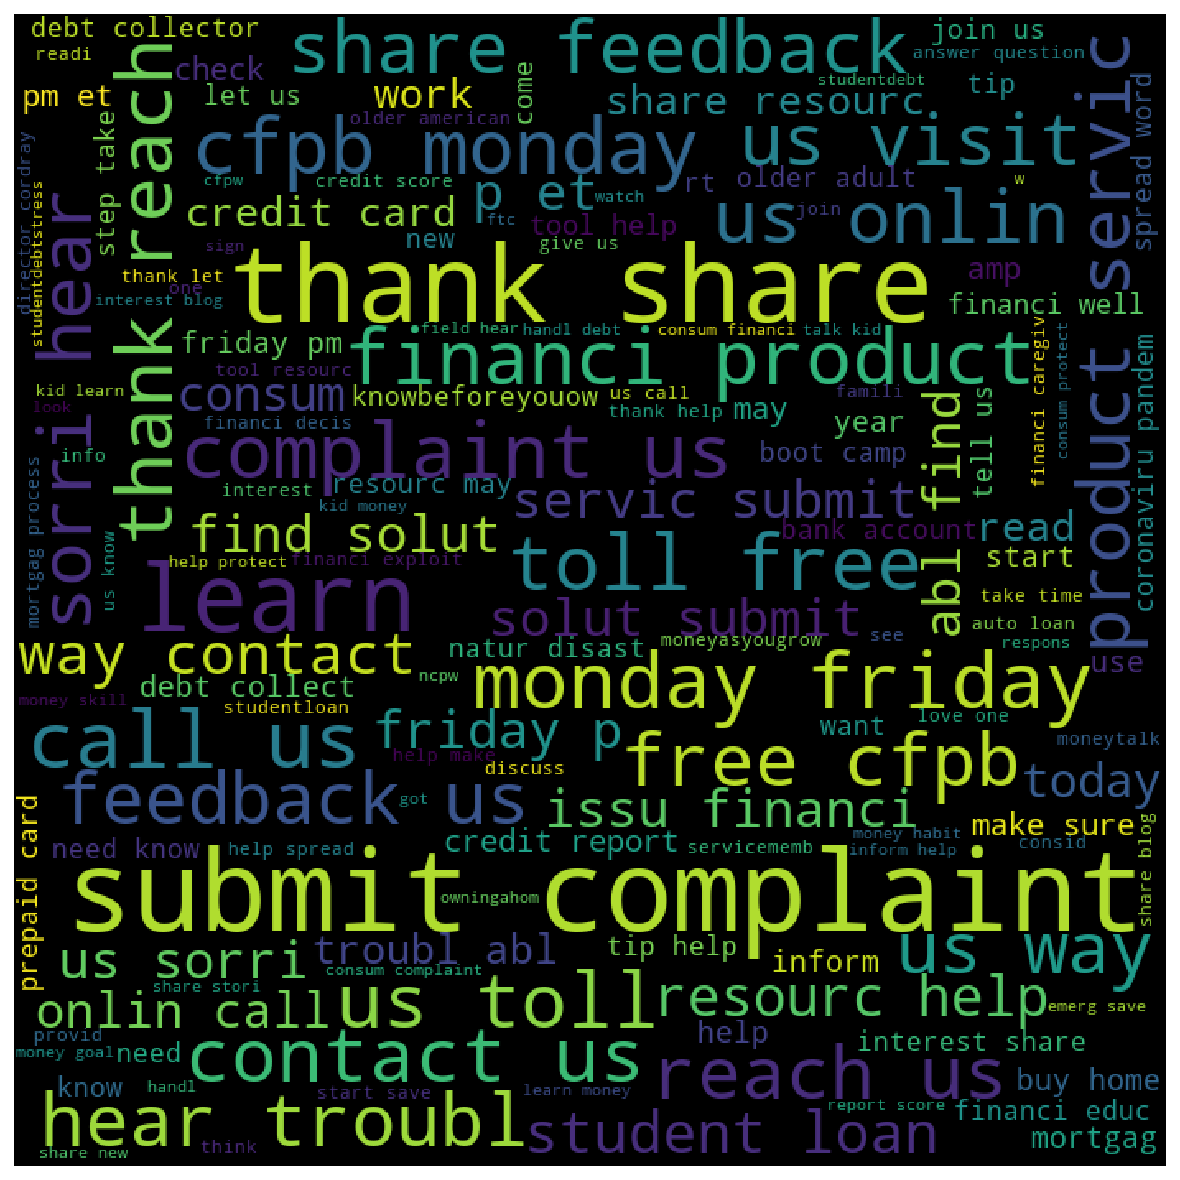

In [28]:
# WorldCloud
#from wordcloud import WordCloud

all_words = '' 

# looping through incidents, join them to one text, extract most common words
for arg in twitter_df["prep"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='black', 
                min_font_size = 10).generate(all_words) 
  
# plotting worldcloud                      
plt.figure(figsize = (8, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  

plt.savefig('6cleaned_wc.png')

plt.show()

Cleaning and preparing the data such as through the use of stop words allows us to get a more accurate understanding of the data and text itself. Not surprisinly, the most common text appears to be about submitting complaints which is expected since the CFPB has a very large complaints database that is regularly updated and consulted. What is interesting is that phrases such as "thank," "reach," "contact," "share," and "submit" are engaging and clear calls to actions, signaling that the CFPB appear to be trying to engage with their audience. 

### Number of tweets

In [29]:
# overall number of tweets per year
pd.to_datetime(twitter_df['parsed_created_at']).dt.year.value_counts()

2018    2171
2019    1765
2016    1612
2017    1344
2015    1240
2020    1127
2013     582
2012     482
2011     480
2014     352
Name: parsed_created_at, dtype: int64

In [30]:
# total favorited tweets by year
twitter_df['parsed_created_at'] = twitter_df['parsed_created_at'].astype('datetime64')
twitter_df.groupby([twitter_df['parsed_created_at'].dt.year])['favorite_count'].sum()

parsed_created_at
2011      350
2012      750
2013     1146
2014     1342
2015     5844
2016    10646
2017     6649
2018     3469
2019     3411
2020     3003
Name: favorite_count, dtype: int64

In [31]:
# saving total tweet count
tweet_count = pd.to_datetime(twitter_df['parsed_created_at']).dt.year.value_counts()
tweet_count = tweet_count.sort_index()
tweet_count

2011     480
2012     482
2013     582
2014     352
2015    1240
2016    1612
2017    1344
2018    2171
2019    1765
2020    1127
Name: parsed_created_at, dtype: int64

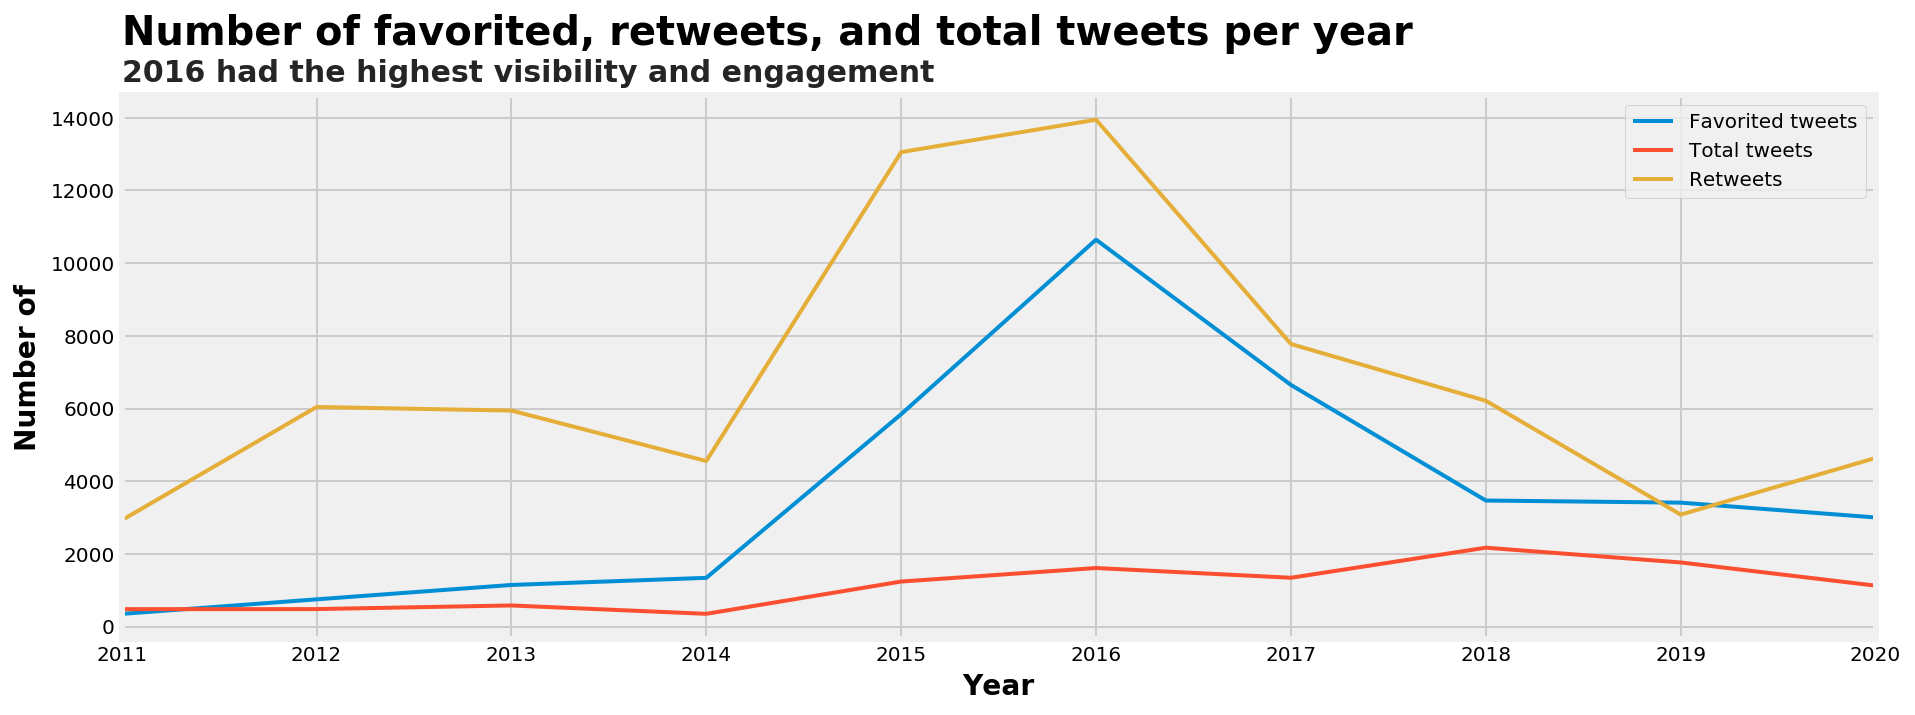

In [32]:
# graphing tweets

# converting 
twitter_df['parsed_created_at'] = twitter_df['parsed_created_at'].astype('datetime64')

# total favorites and retweet count by year
favorites_by_year = twitter_df.groupby([twitter_df['parsed_created_at'].dt.year])["favorite_count"].sum()
retweet_count = twitter_df.groupby([twitter_df['parsed_created_at'].dt.year])["retweet_count"].sum()

# Creating plot, configuring the plot specifications inside the variables fig and ax
fig, ax = plt.subplots(figsize=(14,5))

# Plotting daily variable as a a line plot, set x,y, linewidth, and specifying ax, setting legend
favorite_line = favorites_by_year.plot(kind='line', x='year', y='favorites', linewidth=2, ax=ax, legend=True, label='Favorited tweets')
tweet_count_line = tweet_count.plot(kind='line', x='year', y='favorites', linewidth=2, ax=ax, legend=True, label='Total tweets')
retweet_count_line = retweet_count.plot(kind='line', x='year', y='favorites', linewidth=2, ax=ax, legend=True, label='Retweets')

# Setting x,y label and size
ax.set_xlabel('Year', fontsize=14, fontweight = 'bold')
ax.set_ylabel('Number of', fontsize=14, fontweight = 'bold')

# title and subtitle
ax.text(2011, 16000, "Number of favorited, retweets, and total tweets per year", fontsize=20, fontweight="bold")
ax.text(2011, 15000, "2016 had the highest visibility and engagement", fontsize=15, fontweight="bold", alpha=0.85)

plt.savefig('7tweets_compar.png')

The year 2018 had the most number of tweets, overall. Also, the year 2020 had the lowest number of tweets when comparing from 2015 to today. In terms of favorited tweets, 2016 overwhelmingly had the most when compared to the whole time period between 2011 to 2020. In contrast, the year 2011 had the lowest number of favored tweets and this value has never been as low as that after, but rather, in general, has only increased. The year 2014 to 2016 saw a very sharp and significant hike in the number of favorited tweets. With regards to the retweets, it is the most unstable metric, having reached its lowest point in 2011, its highest in 2016, and shifting in between. 

### Retweets

In [33]:
# creating table of retweets & tweet count
# (https://towardsdatascience.com/visualization-of-information-from-raw-twitter-data-part-1-99181ad19c)
# sorting the values of retweet 
retweets_sorted = twitter_df.sort_values(by=['retweet_count'], ascending=False)

# taking the @RT tweets from string and replacing, grouping by aggregate sum and count
# and sorting by descending order, displaying first 10
table = retweets_sorted[['retweet_count','text']].copy()
table.text = table.text.str.extract('(?:RT )(@[\d\w]*:)')
table.text = table.text.str.replace(":", "")
table = table.groupby("text").aggregate(["sum", "count"]).sort_values([("retweet_count", "sum")], ascending=False).head(10)
# creating and finding average retweet per tweet, rounding
table["retweets per tweet"] = table[("retweet_count", "sum")]/table[("retweet_count", "count")]
table.columns = ["Retweets", "Tweet Count", "Retweets per Tweet"]
round(table, 2)

,Retweets,Tweet Count,Retweets per Tweet
text,,,
@fema,1991,1,1991.00
@FTC,912,33,27.64
@SBAgov,885,7,126.43
@Readygov,783,6,130.50
@IRSnews,603,16,37.69
@CFPBDirector,557,5,111.40
@WhiteHouse,282,2,141.00
@CFPBMilitary,280,25,11.20
@usedgov,219,3,73.00


The table shows some interesting information about the different retweets metrics. For example, the @fema retweet seems to have been the best-performing one. There was one RT (tweet count) of @fema which garnered 1,991 retweets, the highest value, giving it a very impressive performance and competitive average over the others. 

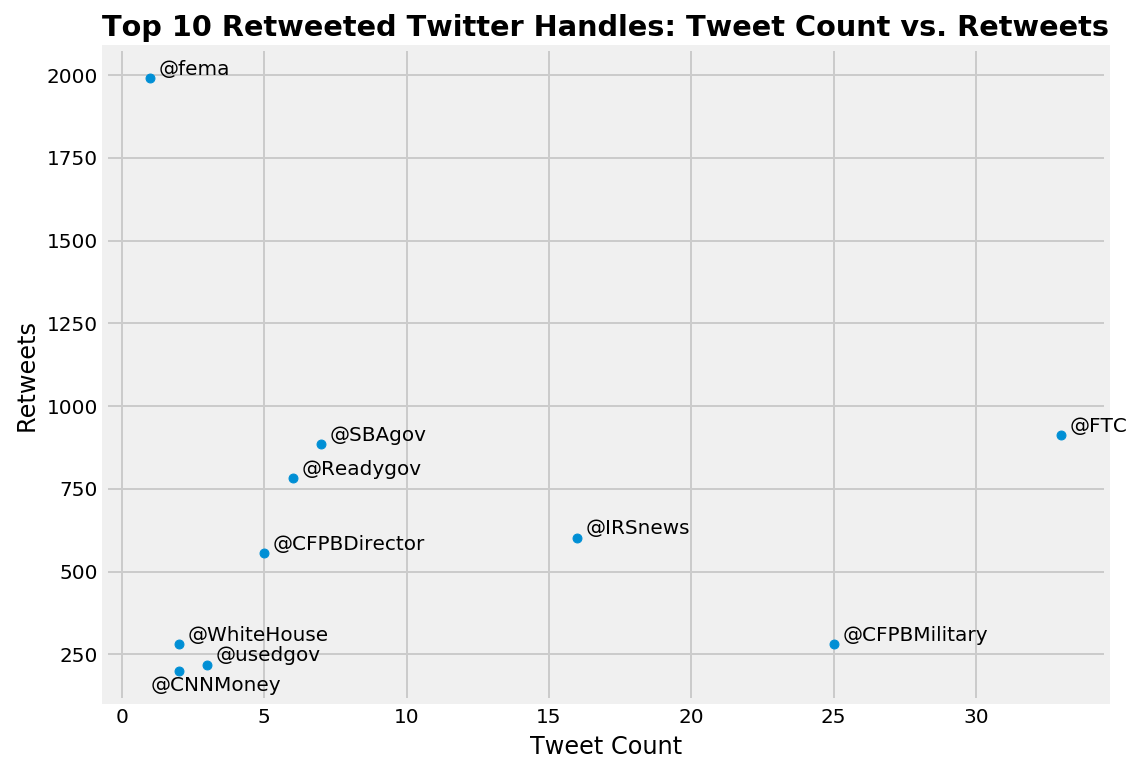

In [34]:
# creating scatterplot of top tweet count and retweets of twitter handles
table.plot.scatter("Tweet Count", "Retweets", figsize=(8,6))
# setting text, esp @CNNMoney so it is legible
for x,y,s in zip(table["Tweet Count"], table["Retweets"], table.index):
    if s == "@CNNMoney":
        plt.text(x-1,y-60,s)
    else:
        plt.text(x+.3,y+10,s)
# title
plt.title("Top 10 Retweeted Twitter Handles: Tweet Count vs. Retweets", fontweight='bold')

plt.savefig('9retweeted.png')

The scatterplot depicts the relation between the number of times a specific Twitter handle tweeted, and the number of retweets. As noted above, @fema did very well, having a very low tweet count but a high number of retweets. @CFPBMilitary performed pretty poorly since it had a relatively high tweet count despite a fairly low retweet count in comparison. 

### Top retweets

In [35]:
# Printing out 10 highest performing tweets sorted by retweet count
for i in range(10):
    print(retweets_sorted.iloc[i]['text'])
    print()

RT @fema: We have created a rumor control page for Hurricane #Florence that will be updated regularly. During disasters, it’s critical to a…

RT @CFPBDirector: Busy day at the @CFPB. Digging into the details. https://t.co/yfs0gmh28F

RT @Readygov: Prepare your home before a hurricane arrives:  🚗 Fill your car up with gas. ⛱ Bring outdoor furniture in and secure items out…

RT @SBAgov: REMINDER: The deadline for SBA to approve #PaycheckProtectionProgram loan applications is TOMORROW.   👇 Find a lender and apply…

When it comes to #mortgages, take your time, ask questions and #knowbeforeyouowe. https://t.co/UUaGyWDbzk

When it comes to #mortgages, take your time, ask questions and #knowbeforeyouowe. https://t.co/UUaGyWDbzk

If you have been affected by Hurricane #Harvey, we have resources to help you protect and rebuild your finances. https://t.co/Bdhnes6FWD https://t.co/SJ1qjf9Tvc

RT @FTC: FTC warns hurricane victims about flood insurance robocall scam: https://t.co/mLNaukeu2O #Harvey 

## Conclusion

The @CFPB Twitter page includes all tweets from early February 2011 to October 2020. The page's tweet breakdown is around 75% original tweets, followed in second by replies. The use of hashtags such as #KnowBeforeYouOwe, #MoneyAsYouGrow, and #StudentDebtStress signal to us that knowing more about money, saving up, and handling student stress due to debt are topics that are brought up more often in their posts. The account also appears to be more busy during the week, particularly around Tuesday-Thursday and has very low activity on the weekends, particularly Sunday.

The most common words in the twitter dataset were calls to action (action-oriented) and include words such as "help," "thank," "complaint", "share," "learn," and "submit." Regarding the different types of tweets, favorite, retweet, and tweet, the years 2014 to 2016 were the best years overall, with 2016 breaking records and reaching its peak in terms of the number of favorited tweets and retweets. The frequency of tweets that are retweets appear to be the most "volatile" with more sudden changes and not a very clear trend. In 2020, however, the retweets and favorited tweets have been slighlty declining and look like they could continue along that trend. 

Overall, the Twitter page could do better, particularly with regard to its own Twitter activity since the metrics that have done the best are those that are retweets of others rather than those done by the CFPB themselves. The best performing one was a retweet from @FEMA regarding hurricane Florence. In fact, among the top 10 best performing retweet types, four of them mentioned hurricanes. The paycheck protection program (often mentioned along with @SBAgov) comes in second place, which is expected given the pandemic. 